### Student's t-test:
Tests whether the means of two independent samples are significantly different.
One-sample student's t-test
Test a sample with a known standard value. 
**Assumptions**
- Observations in each sample are independent and identically distributed.
- Observations in each sample are normally distributed.
 **Interpretation**
**H0:** the means of the samples are equal to the known value.
**H1:** the means of the samples are unequal to the known value.

Independent student's t-test

**Assumptions**
- Observations in each sample are independent and identically distributed.
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
**Interpretation**
**H0:** the means of the samples are equal.
**H1:** the means of the samples are unequal.

**Paired student's t-test**
Tests whether the means of two paired samples are significantly different.
**Assumptions**
- Observations in each sample are independent and identically distributed.
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.
**Interpretation**
**H0:** the means of the samples are equal.
**H1:** the means of the samples are unequal.

In [58]:
## one sample t test
#import libraries

import seaborn as sns
import pandas as pd
from scipy.stats import ttest_1samp


df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df1 =df[['sex','age','fare']]
df1

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
...,...,...,...
886,male,27.0,13.0000
887,female,19.0,30.0000
888,female,NaN,23.4500
889,male,26.0,30.0000


In [60]:
df1.isnull().sum()

sex       0
age     177
fare      0
dtype: int64

### That is used to select the value that is not a null

In [61]:
df1 = df[df['age'].notna()]

In [62]:
df1['age'].isnull().sum()

0

In [63]:
df1.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [64]:
## check the age and compate it with 45 years value

ttest_1samp(df1['age'],45)

Ttest_1sampResult(statistic=-28.14522164634589, pvalue=8.569358852911548e-118)

In [65]:
df1['age'].isnull().sum()

0

### We need to normalise the data 

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

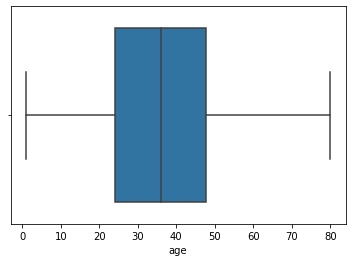

In [66]:
ks= sns.load_dataset("titanic")
ks = ks.dropna()
sns.boxplot(ks['age'])

In [67]:
ttest_1samp(df1['age'],45)

Ttest_1sampResult(statistic=-28.14522164634589, pvalue=8.569358852911548e-118)

### Applyin normalisation and standardization

### The column above shows that min and max value have large difference in it,also the std i higher

#### StandardScaler from sci-kit-learn removes the mean and scales the data to unit variance. We can import the StandardScalar method from sci-kit learn and apply it to our dataset.

In [43]:
df1 = df[['age','fare']]

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(df1)

In [45]:
data_scaled

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [46]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[           nan 3.98733297e-18]
[nan  1.]


As expected, the mean of each variable is now around zero and the standard deviation is set to 1. Thus, all the variable values lie within the same range.

In [47]:
print('Min values (age, fare ): ', data_scaled.min(axis=0))
print('Max values (age,fare): ', data_scaled.max(axis=0))

Min values (age, fare ):  [        nan -0.64842165]
Max values (age,fare):  [       nan 9.66716653]


#### Min max scalar 
### the minimum and maximum values are standardized across variables, different from what occurs with standardization.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df1)

In [49]:
print('Min (age,fare): ', data_scaled.min(axis=0))
print('Max (age,fare): ', data_scaled.max(axis=0))

Min (age,fare):  [nan  0.]
Max (age,fare):  [nan  1.]


In [50]:
df1.describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [51]:
df1.describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [52]:
ttest_1samp(df1['age'],45)

Ttest_1sampResult(statistic=nan, pvalue=nan)

## Independant student ttest

In [53]:
## Two sample ttest

In [68]:
df_male = df1.loc[df1['sex'] == 'male']
df_female = df1.loc[df1['sex'] == 'female']

In [69]:
#import library
from scipy.stats import ttest_ind

stat, p = ttest_ind(df_male['age'],df_female['age'])
print('stat=%.3f, p=%.3f' % (stat, p))

# make a coditional argument for further use
if p > 0.05:
	print('Probably Gaussian or Normal Distribution')
else:
	print('Probably different distribution')

stat=2.499, p=0.013
Probably different distribution


In [70]:
df_male.describe()

,survived,pclass,age,sibsp,parch,fare
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,0.205298,2.335541,30.726645,0.439294,0.271523,27.268836
std,0.404366,0.818748,14.678201,0.923609,0.651076,45.841889
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,13.000000
75%,0.000000,3.000000,39.000000,1.000000,0.000000,28.500000
max,1.000000,3.000000,80.000000,5.000000,5.000000,512.329200


In [71]:
## now Third ttest called paired ttest

In [72]:

df_male = df1.loc[df1['sex'] == 'male']


df_male.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [73]:
## now select first class for male 

df_male_first = df_male[df_male['class'] == 'First']
df_male_second = df_male[df_male['class'] == 'Second']
df_male_third = df_male[df_male['class'] == 'Third']


In [74]:
df_male_second.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
20,0,2,male,35.0,0,0,26.0,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0,S,Second,man,True,D,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5,S,Second,man,True,NaN,Southampton,no,True
70,0,2,male,32.0,0,0,10.5,S,Second,man,True,NaN,Southampton,no,True
72,0,2,male,21.0,0,0,73.5,S,Second,man,True,NaN,Southampton,no,True


In [79]:
df_1st = df_male_first.sample(n=100,replace="True")
df_2st = df_male_second.sample(n=100,replace ="True")
df_1st.shape

(100, 15)

In [81]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(df_1st['age'],df_2st['age'])
print('stat=%.3f, p=%.3f' % (stat, p))

# make a coditional argument for further use
if p > 0.05:
	print('Probably Gaussian or Normal Distribution')
else:
	print('Probably different distribution')

stat=8.555, p=0.000
Probably different distribution


### Apply ttest on different dataset

In [82]:
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_1samp


df = pd.read_csv("salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [86]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [85]:
## on sample t test
ttest_1samp(df['Salary'],7777)

Ttest_1sampResult(statistic=13.631113067820765, pvalue=3.8582562253428165e-14)